In [28]:
from statistics import mean
from math import sqrt

def correlationCoefficient(x,y):
    assert len(x) == len(y), "Datasets must be the same length"
        
    n = len(x)
    num1 = sum([i * j for i, j in zip(x,y)])
    num2 = n * mean(x) * mean(y)
    den1 = sum([i**2 for i in x]) - n * mean(x)**2
    den2 = sum([i**2 for i in y]) - n * mean(y)**2
    print((num1 - num2) / (sqrt(den1) * sqrt(den2)))
    
x = [95,85,80,70,60,]
y = [85,95,70,65,70]

correlationCoefficient(x,y)

0.6930525298193005


Estimated coefficients:
b_0 = 26.78082191780822 
b_1 = 0.6438356164383562


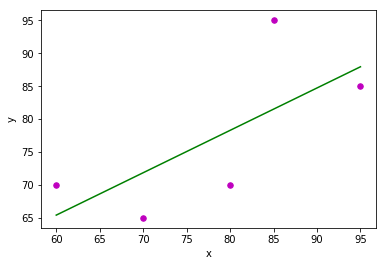

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 

def simpleRegression(x, y): 
    # number of observations/points 
    assert len(x) == len(y), "Datasets must be the same length"
    
    n = np.size(x) 

    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 

    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 

    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 

    return(b_0, b_1) 

def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    # predicted response vector 
    y_pred = b[0] + b[1]*x 

    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 

    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

    # function to show plot 
    plt.show() 

def main(): 
    # observations 
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
    
    x = np.array([95,85,80,70,60,])
    y = np.array([85,95,70,65,70])

    # estimating coefficients 
    b = simpleRegression(x, y) 
    print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1])) 

    # plotting regression line 
    plot_regression_line(x, y, b) 

if __name__ == "__main__": 
    main()
 




In [36]:
from math import sqrt

x = [1,1,1,1,0]
y = [1,0,1,0,4]

def euclideanDistance(x,y):
    distance = sqrt( sum( [ abs( i-j ) for i,j in zip(x,y)]))
    return distance

euclideanDistance(x,y)

2.449489742783178

In [38]:
'''A confusion matrix is a table that is often used to describe the performance of a classification model 
(or "classifier") on a set of test data for which the true values are known.'''

import numpy

def confusionMatrix(A):
    # A is a numpy matrix of the form [True Positive, False Positive; False Negative, True Negative]
    # total =  tp + fp + fn + tn
    total = A.sum()
    
    tp, fp, fn, tn = A[1,1], Ap[1,2], A[2,1], A[2,2] 
    
    accuracy = (tp + tn) / total # value ranging [0,1], best case fn = fp = 0 and accuracy = 1.
    error_rate = 1 - accuracy
    positivePredictiveValue = tp / (tp + fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    